# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [197]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc,
    make_scorer,
)

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [198]:
dataTemp = pd.read_csv("https://raw.githubusercontent.com/lhughey/AIML_Course/main/CaseStudy2%20-%20Personal%20Loan%20Campaign/Loan_Modelling.csv")

## Loading the dataset

In [199]:
data = dataTemp.copy()

## Data Overview

* Observations
* Sanity checks

In [200]:
print("info")
print(data.info)
print("---------------------------")
print("shape")
print(data.shape)
print("---------------------------")
print("head")
print(data.head())
print("---------------------------")
print("tail")
print(data.tail())


info
<bound method DataFrame.info of         ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
  - More than 50% of customers have no mortgage This can be explained that they either pay rent, live with family, or have paid off their mortgage.
  - Also, there are a lot of outliers in this distribution.
2. How many customers have credit cards?
  - 1470 out of 5000 customers have credit cards.
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
  - Income and credit card average have the highest correlations to the target attribute. The person's income has a correlation of .49, whereas the credit card average has a correlation of .36.
4. How does a customer's interest in purchasing a loan vary with their age?
  - The take rate is general is correlated with a users age group. Older age groups have higher take rates than younger groups, with the 40-50 age group having the highest take rate.
5. How does a customer's interest in purchasing a loan vary with their education?
  - The interest in purchasing a loan is directly porportional to their eduction, on average. Those with more education are more likely to purchase a loan.

In [201]:
numberOfCreditCards = data['CreditCard'].value_counts()
print(numberOfCreditCards)

CreditCard
0    3530
1    1470
Name: count, dtype: int64


In [202]:
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [203]:
#determine nulls and bad data
data.isnull().sum()


,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


[  0 155 104 134 111 260 163 159  97 122 193 198 285 412 153 211 207 240
 455 112 336 132 118 174 126 236 166 136 309 103 366 101 251 276 161 149
 188 116 135 244 164  81 315 140  95  89  90 105 100 282 209 249  91  98
 145 150 169 280  99  78 264 113 117 325 121 138  77 158 109 131 391  88
 129 196 617 123 167 190 248  82 402 360 392 185 419 270 148 466 175 147
 220 133 182 290 125 124 224 141 119 139 115 458 172 156 547 470 304 221
 108 179 271 378 176  76 314  87 203 180 230 137 152 485 300 272 144  94
 208 275  83 218 327 322 205 227 239  85 160 364 449  75 107  92 187 355
 106 587 214 307 263 310 127 252 170 265 177 305 372  79 301 232 289 212
 250  84 130 303 256 259 204 524 157 231 287 247 333 229 357 361 294  86
 329 142 184 442 233 215 394 475 197 228 297 128 241 437 178 428 162 234
 257 219 337 382 397 181 120 380 200 433 222 483 154 171 146 110 201 277
 268 237 102  93 354 195 194 238 226 318 342 266 114 245 341 421 359 565
 319 151 267 601 567 352 284 199  80 334 389 186 24

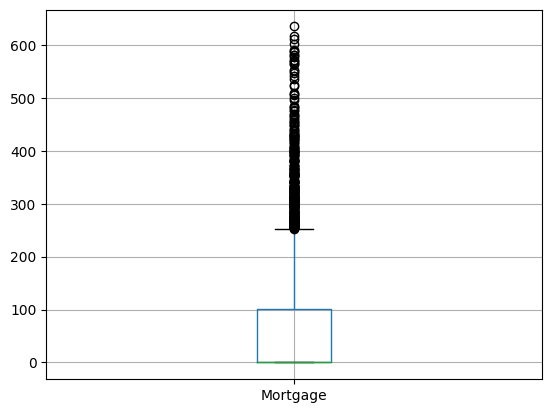

In [204]:
#determine the distinct mortgage values to look for bad data
distinctVals = data['Mortgage'].unique()
print(distinctVals)

#determine the distribution of the mortgage
# data['Mortgage'].hist()
# plt.show()

data.boxplot(column=['Mortgage'])
plt.show()

In [205]:
#remove outliers using IQR
Q1 = data['Mortgage'].quantile(0.25)
Q3 = data['Mortgage'].quantile(0.75)
#find the mean
median = data['Mortgage'].median()

IQR = Q3 - Q1

print(IQR, Q1, Q3, median)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

#evaluate how much sits outside the IQR
print(data.shape)

#display outliers
outliers = data[(data['Mortgage'] <= lower_bound) |(data['Mortgage'] >= upper_bound)]
print("the number of the outliers is {}" .format(outliers['Mortgage'].value_counts))

#remove outliers
dataCleaned = data[(data['Mortgage'] > lower_bound) & (data['Mortgage'] < upper_bound)]
print("the number of the records with outliers removed is {}" .format(dataCleaned['Mortgage'].value_counts))


101.0 0.0 101.0 0.0
-151.5 252.5
(5000, 14)
the number of the outliers is <bound method IndexOpsMixin.value_counts of 22      260
39      285
42      412
59      455
66      336
       ... 
4859    541
4865    342
4899    299
4942    308
4963    306
Name: Mortgage, Length: 291, dtype: int64>
the number of the records with outliers removed is <bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
4995     0
4996    85
4997     0
4998     0
4999     0
Name: Mortgage, Length: 4709, dtype: int64>


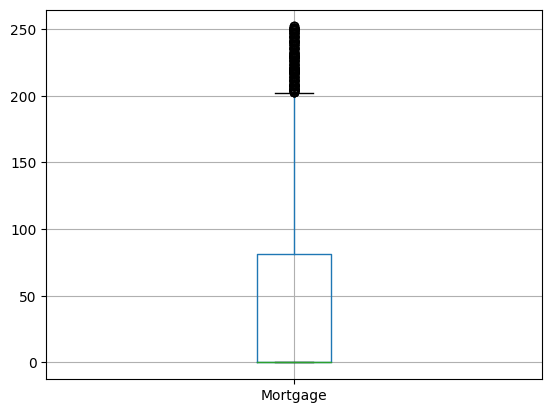

<Figure size 1000x500 with 0 Axes>

In [206]:
#view the updated data with no outliers
dataCleaned.boxplot(column=['Mortgage'])
plt.figure(figsize=(10, 5))
plt.show()


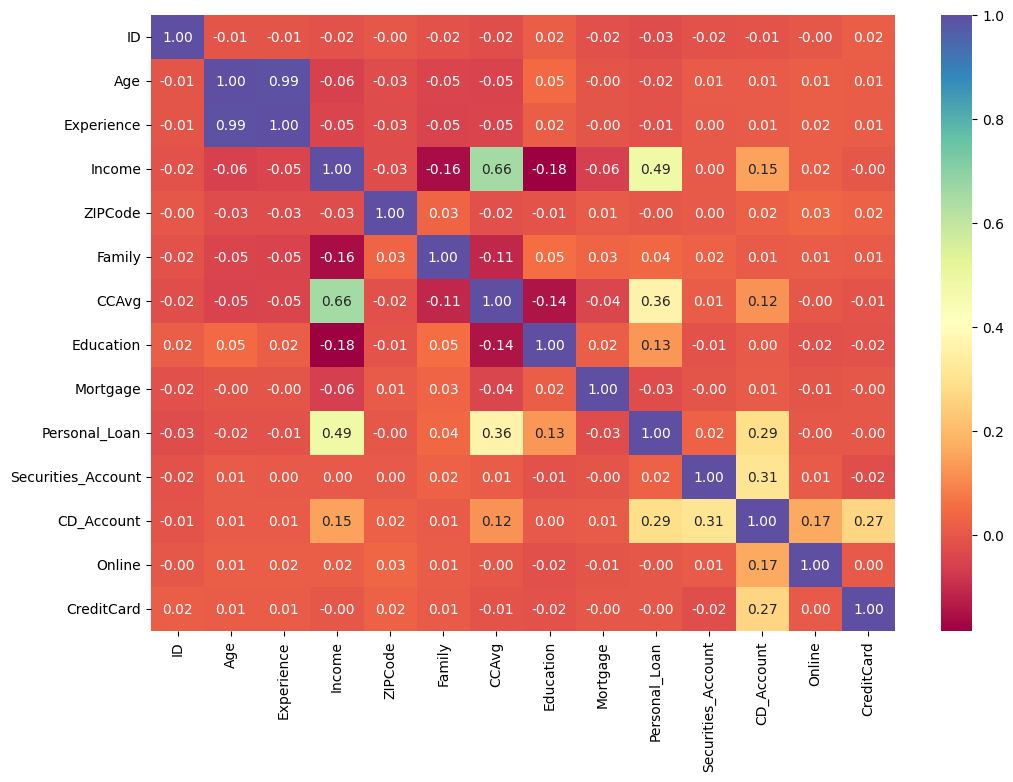

In [207]:
#determine corelation between columnsd and personal loan
dataCleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(dataCleaned.corr(), annot=True, fmt=".2f", cmap='Spectral')
plt.show()

<ipython-input-208-2ab93f8e775d>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataCleaned.groupby('AgeGroup')['CreditCard'].value_counts()
<ipython-input-208-2ab93f8e775d>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataCleaned.groupby(['AgeGroup', 'CreditCard']).size().unstack().plot(kind='bar', stacked=True)


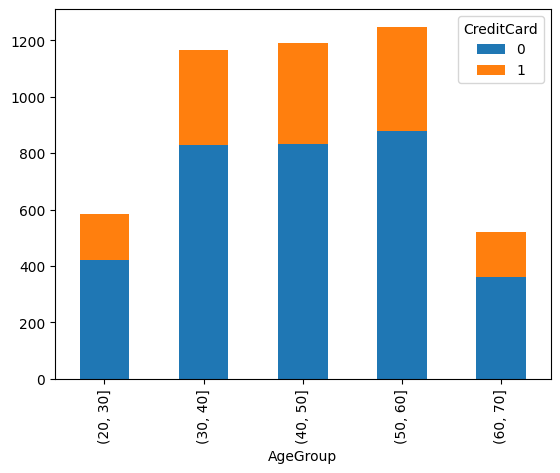

In [208]:
#determine interest in obtaining a credit card dependant on age
dataCleaned.groupby('Age')['CreditCard'].value_counts()

#group the Age column values by 10, and add a column
dataCleaned['AgeGroup'] = pd.cut(dataCleaned['Age'], bins=range(20, 80, 10))

dataCleaned.head()
dataCleaned.groupby('AgeGroup')['CreditCard'].value_counts()

#create a stacked bar plot of Education and Personal_Loan
dataCleaned.groupby(['AgeGroup', 'CreditCard']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

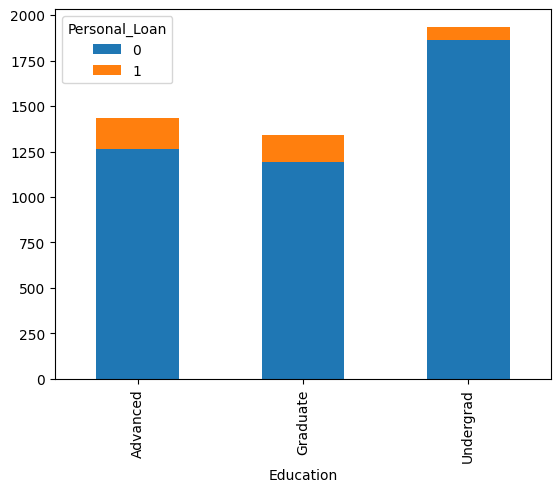

In [209]:
#create a column called Education_Level, set : Undergrad; 2: Graduate;3: Advanced
dataCleaned['Education'] = dataCleaned['Education'].map({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced'})

dataCleaned.head()

#create a stacked bar plot of Education and Personal_Loan
dataCleaned.groupby(['Education', 'Personal_Loan']).size().unstack().plot(kind='bar', stacked=True)
plt.show()


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [210]:
#determine null values
dataCleaned.isnull().sum()
#determine if any numeric valued columns contained values less than 0
dataCleaned.describe()

#the experience column has values less than zero. Experience should never be less than zero, so use the abolute value
print(dataCleaned['Experience'].dtype) #all records are numeric

dataCleaned.loc[:, 'Experience'] = dataCleaned['Experience'].abs()

dataTest = dataCleaned[dataCleaned['Experience'] < 0]
print(dataTest)

dataCleaned.describe()

#outlier treatment has been done above



int64
Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard, AgeGroup]
Index: []


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000
mean,2502.037163,45.379061,20.169250,70.359524,93169.073052,2.411977,1.868152,38.011467,0.082183,0.104693,0.054152,0.596942,0.294542
std,1447.450608,11.474811,11.433084,44.261672,1757.509712,1.150779,1.688058,68.100514,0.274673,0.306190,0.226341,0.490564,0.455885
min,1.000000,23.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1245.000000,35.000000,10.000000,38.000000,91911.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2502.000000,45.000000,20.000000,61.000000,93437.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3756.000000,55.000000,30.000000,91.000000,94608.000000,3.000000,2.500000,81.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,252.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [211]:
#determine datatype of ZIPCode
print(dataCleaned['ZIPCode'].dtype)

#set ZipCode to 2 number length to reduce the number of unique values
dataCleaned.loc[:, 'ZIPCode'] = dataCleaned['ZIPCode'].astype(str).str[:2]

dataCleaned.head()
dataCleaned['ZIPCode'].value_counts()

int64


,count
ZIPCode,
94,1390
92,933
95,763
90,659
91,533
93,394
96,37


In [212]:
# defining the explanatory (independent) and response (dependent) variables
X = dataCleaned.drop(["Personal_Loan"], axis=1)
y = dataCleaned["Personal_Loan"]

#set categorial columns names into an array
cat_cols = ["Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard", "ZIPCode"]

#ignore inplace errors
pd.options.mode.chained_assignment = None

dataCleaned[cat_cols] = dataCleaned[cat_cols].astype("category")

dataCleaned.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,AgeGroup
0,1,25,1,49,91,4,1.6,Undergrad,0,0,1,0,0,0,"(20, 30]"
1,2,45,19,34,90,3,1.5,Undergrad,0,0,1,0,0,0,"(40, 50]"
2,3,39,15,11,94,1,1.0,Undergrad,0,0,0,0,0,0,"(30, 40]"
3,4,35,9,100,94,1,2.7,Graduate,0,0,0,0,0,0,"(30, 40]"
4,5,35,8,45,91,4,1.0,Graduate,0,0,0,0,0,1,"(30, 40]"


In [214]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(int)

# label encoding the response variable
y = y.map({'Yes': 1, 'No': 0})
y.head()

X.head()

X.info()

# splitting the data in an 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Index: 4709 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   4709 non-null   int64
 1   Age                  4709 non-null   int64
 2   Experience           4709 non-null   int64
 3   Income               4709 non-null   int64
 4   Family               4709 non-null   int64
 5   CCAvg                4709 non-null   int64
 6   Mortgage             4709 non-null   int64
 7   Securities_Account   4709 non-null   int64
 8   CD_Account           4709 non-null   int64
 9   Online               4709 non-null   int64
 10  CreditCard           4709 non-null   int64
 11  ZIPCode_91           4709 non-null   int64
 12  ZIPCode_92           4709 non-null   int64
 13  ZIPCode_93           4709 non-null   int64
 14  ZIPCode_94           4709 non-null   int64
 15  ZIPCode_95           4709 non-null   int64
 16  ZIPCode_96           4709 non

ValueError: Input y contains NaN.

## Model Building

### Model Evaluation Criterion

*


### Model Building

### Model Performance Improvement

## Model Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___